In [61]:
import pandas as pd

file_path = '/content/drive/Shareddrives/Faraz /Sentiment Analysis 1/prothom_alo_news_dataset_with_content.csv'
df = pd.read_csv(file_path)


df.head(1)


,headline,subheadline,date,slug,url,full_content
0,Stray incidents of violence mark 2nd day non-s...,NaN,1388674612000,bangladesh/Stray-incidents-of-violence-mark-2n...,https://en.prothomalo.com/bangladesh/Stray-inc...,"The second day of the indefinite blockade, enf..."


In [63]:
df.drop(columns=['subheadline'], inplace=True)
df.head()

,headline,date,slug,url,full_content
0,Stray incidents of violence mark 2nd day non-s...,1388674612000,bangladesh/Stray-incidents-of-violence-mark-2n...,https://en.prothomalo.com/bangladesh/Stray-inc...,"The second day of the indefinite blockade, enf..."
1,Mawa-Kawrakandi ferry link resumes after 5 hours,1388675979000,bangladesh/Mawa-Kawrakandi-ferry-link-resumes-...,https://en.prothomalo.com/bangladesh/Mawa-Kawr...,Ferry services on the Mawa-Kawrakandi route r...
2,Joint forces detain 30 in Ctg,1388676478000,bangladesh/Joint-forces-detain-30-in-Ctg,https://en.prothomalo.com/bangladesh/Joint-for...,Different teams of the joint forces detained 3...
3,Army organises eye camp in Faridpur,1388842626000,bangladesh/Army-organises-eye-camp-in-Faridpur,https://en.prothomalo.com/bangladesh/Army-orga...,The ninth infantry division of Bangladesh Army...
4,Tarique's video message urges people to boycot...,1388853704000,bangladesh/Tarique-s-video-message-urges-peopl...,https://en.prothomalo.com/bangladesh/Tarique-s...,BNP senior vice president Tarique Rahman appea...


In [64]:
df['date'] = pd.to_datetime(df['date'], unit='ms')
df['year'] = df['date'].dt.year
df['year'].iloc[0]

2014

In [68]:
df_sorted = df.sort_values(by='year')
print(df_sorted.head())

                                             headline                date  \
35                     Boy burnt to death in Ctg fire 2014-01-22 16:04:13   
36                    Blankets distributed in Rangpur 2014-01-22 16:06:03   
37               Manjur murder case verdict on Feb 10 2014-01-22 16:07:08   
38  Six govt projects singled out for top priority... 2014-01-22 16:08:48   
39                        Woman found dead in Jessore 2014-01-25 12:14:43   

                                                 slug  \
35          bangladesh/Boy-burnt-to-death-in-Ctg-fire   
36         bangladesh/Blankets-distributed-in-Rangpur   
37    bangladesh/Manjur-murder-case-verdict-on-Feb-10   
38  bangladesh/Six-govt-projects-singled-out-for-t...   
39             bangladesh/Woman-found-dead-in-Jessore   

                                                  url  \
35  https://en.prothomalo.com/bangladesh/Boy-burnt...   
36  https://en.prothomalo.com/bangladesh/Blankets-...   
37  https://en.prothoma

In [69]:
df['full_content']= df['full_content'].str.replace('\n', ' ', regex=False)

In [70]:
df['text'] = df['headline'] + ' ' + df['full_content']
df['text']

,text
0,Stray incidents of violence mark 2nd day non-s...
1,Mawa-Kawrakandi ferry link resumes after 5 hou...
2,Joint forces detain 30 in Ctg Different teams ...
3,Army organises eye camp in Faridpur The ninth ...
4,Tarique's video message urges people to boycot...
...,...
9895,2 drops of water don’t mean rainfall: Russia R...
9896,Tavella’s body to be sent to Italy Wednesday C...
9897,Foreign nationals’ killers to be tried: PM Pri...
9898,BNP leader Tipu comes under attack BNP's assis...


In [71]:
df = df.dropna(subset=['text'])

In [72]:
df.iloc[0]['text']

"Stray incidents of violence mark 2nd day non-stop blockade The second day of the indefinite blockade, enforced by the BNP-led 18-Party Alliance, continues amid stray incidents of violence on Thursady.  Called for resisting the January 5 'one-sided' parliamentary polls, the blockade programme will continue until further announcement, as declared by the party.  In the capital, blockaders blasted 2-3 crude bombs on the Topkhana road in Shahbag area at about 8:40am. However, none was injured in the explosion.  Miscreants near Sony Cinema in Mirpur-2 torched a Pallabi Super Service bus commuting the Gulistan-Pallabi route at about 9:35am. Firefighters came in and doused the flames.  Rickshaws and auto-rickshaws were dominating the city streets. Presence of public transport on the city streets was higher than the first day of the blockade although no long-route bus entered or left the city. In Gazipur, three people sustained burn injuries as blockaders set fire to a truck by hurling a petro

In [73]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens]
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)


In [75]:
df['cleaned_text'] = df['text'].apply(preprocess_text)


In [77]:
df.iloc[0]['cleaned_text']


'stray incid violenc mark 2nd day blockad second day indefinit blockad enforc allianc continu amid stray incid violenc thursadi call resist januari 5 parliamentari poll blockad programm continu announc declar parti capit blockad blast crude bomb topkhana road shahbag area howev none injur explos miscreant near soni cinema torch pallabi super servic bu commut rout firefight came dous flame rickshaw domin citi street presenc public transport citi street higher first day blockad although bu enter left citi gazipur three peopl sustain burn injuri blockad set fire truck hurl petrol bomb shafipur kaliakoir upazila wednesday night nator blockad set tyre fire harishpur bypass road station bazaar area town morn meanwhil veget vendor mofazz hossain got injuri blockad hurl brickbat truck dighapatia town wednesday night satkhira blockad torch truck near bhomra port sadar upazila wednesday first day blockad pass amid incid violenc leav jubo dal man dead bgb fire chandpur wednesday opposit allianc t

In [82]:
from transformers import pipeline

# Load the sentiment analysis pipeline
sentiment_analyzer = pipeline('sentiment-analysis',device=0)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [84]:
from transformers import DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def truncate_text(text, max_length=512):
    tokens = tokenizer.encode(text, truncation=True, max_length=max_length, return_tensors='pt')
    return tokenizer.decode(tokens[0], skip_special_tokens=True)

# Apply truncation to the text
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: truncate_text(x))


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [86]:
# Apply sentiment analysis
df['sentiment'] = df['cleaned_text'].apply(lambda x: sentiment_analyzer(x)[0]['label'])
df['sentiment']


,sentiment
0,NEGATIVE
1,NEGATIVE
2,NEGATIVE
3,NEGATIVE
4,NEGATIVE
...,...
9895,NEGATIVE
9896,NEGATIVE
9897,NEGATIVE
9898,NEGATIVE


In [88]:
# Check the distribution of sentiment labels
print(df['sentiment'].value_counts())


sentiment
NEGATIVE    9880
POSITIVE      20
Name: count, dtype: int64


In [91]:
# Display some samples
print(df[['cleaned_text', 'sentiment']].head(10))

                                        cleaned_text sentiment
0  stray incid violenc mark 2nd day blockad secon...  NEGATIVE
1  ferri link resum 5 hour ferri servic rout resu...  NEGATIVE
2  joint forc detain 30 ctg differ team joint for...  NEGATIVE
3  armi organis eye camp faridpur ninth infantri ...  NEGATIVE
4  tariqu video messag urg peopl boycott elect bn...  NEGATIVE
5  cec hope peac elect cec kazi rakibuddin ahmad ...  NEGATIVE
6  bomb attack polic rajshahi attack polic polic ...  NEGATIVE
7  nator train attack leav 14 hurt suspect opposi...  NEGATIVE
8  bangladesh inflat quicken polit turmoil mount ...  NEGATIVE
9  poll 10 parliamentari elect hitherto garner pe...  NEGATIVE


In [95]:
sentiment_by_year = df.groupby('year')['sentiment'].value_counts().unstack().fillna(0)
sentiment_by_year['total'] = sentiment_by_year.sum(axis=1)
sentiment_by_year['positive_percentage'] = (sentiment_by_year['POSITIVE'] / sentiment_by_year['total']) * 100
sentiment_by_year['negative_percentage'] = (sentiment_by_year['NEGATIVE'] / sentiment_by_year['total']) * 100

print(sentiment_by_year)


sentiment  NEGATIVE  POSITIVE  total  positive_percentage  negative_percentage
year                                                                          
2014           5045        12   5057             0.237295            99.762705
2015           4835         8   4843             0.165187            99.834813


<Figure size 1200x600 with 0 Axes>

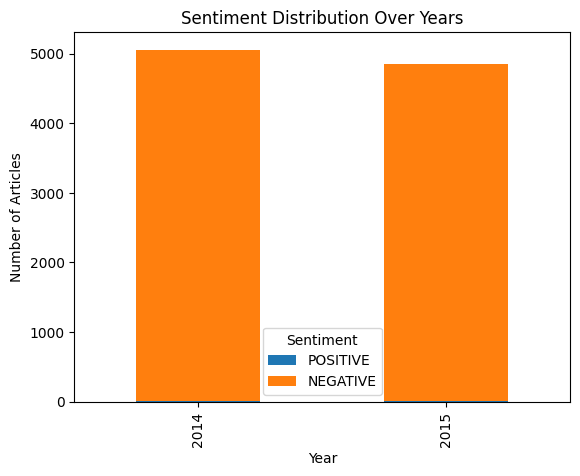

In [97]:
import matplotlib.pyplot as plt

# Plot sentiment counts by year
plt.figure(figsize=(12, 6))
sentiment_by_year[['POSITIVE', 'NEGATIVE']].plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend(title='Sentiment')
plt.show()

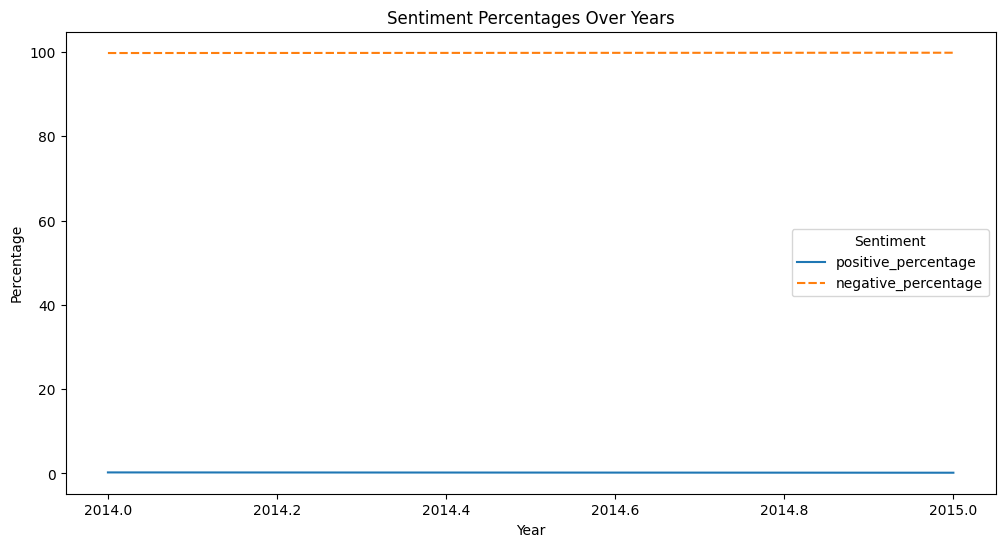

In [99]:
import seaborn as sns

# Plot sentiment percentages by year
plt.figure(figsize=(12, 6))
sns.lineplot(data=sentiment_by_year[['positive_percentage', 'negative_percentage']])
plt.title('Sentiment Percentages Over Years')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Sentiment')
plt.show()

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the cleaned text
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['full_content'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display topics
for index, topic in enumerate(lda.components_):
    print(f"Topic {index}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topic 0:
['latest', 'channel', 'follow', 'city', 'prothom', 'alo', 'police', 'dhaka', 'news', 'said']
Topic 1:
['year', 'workers', 'ministry', 'prothom', 'alo', 'government', 'bangladesh', 'tk', 'news', 'said']
Topic 2:
['people', 'country', 'sheikh', 'government', 'hasina', 'news', 'prime', 'said', 'minister', 'bangladesh']
Topic 3:
['khaleda', 'leaders', 'prothom', 'alo', 'league', 'government', 'news', 'party', 'said', 'bnp']
Topic 4:
['follow', 'latest', 'google', 'channel', 'court', 'prothom', 'alo', 'said', 'news', 'police']


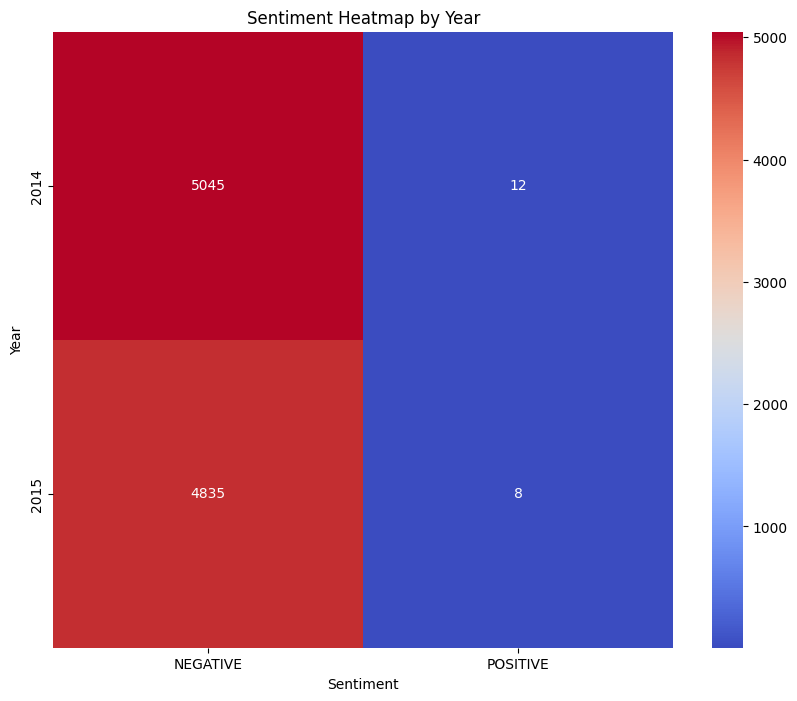

In [104]:
import seaborn as sns

# Pivot the data for heatmap
heatmap_data = df.pivot_table(index='year', columns='sentiment', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='d')
plt.title('Sentiment Heatmap by Year')
plt.xlabel('Sentiment')
plt.ylabel('Year')
plt.show()